In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/Users/sarahdarlyna/Downloads/cardio_train.csv', sep = ';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### PRE-PROCESSING

In [4]:
df.shape

(70000, 13)

In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
numerical_col = ['age','weight','height','ap_hi','ap_lo']

<Axes: >

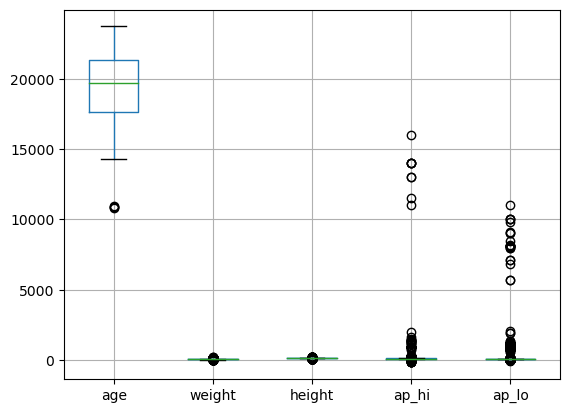

In [7]:
df.boxplot(numerical_col)

In [8]:
for x in ['age']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [9]:
df.isnull().sum()

id             0
age            4
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
df_n = df.dropna(axis = 0)

In [11]:
for x in ['weight']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_n.loc[df[x] < min,x] = np.nan
    df_n.loc[df[x] > max,x] = np.nan

In [12]:
df_n1 = df_n.dropna(axis = 0)

In [13]:
for x in ['height']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_n1.loc[df[x] < min,x] = np.nan
    df_n1.loc[df[x] > max,x] = np.nan

In [14]:
df_n2 = df_n1.dropna(axis = 0)

In [15]:
for x in ['ap_hi']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_n2.loc[df[x] < min,x] = np.nan
    df_n2.loc[df[x] > max,x] = np.nan

In [16]:
df_n3 = df_n2.dropna(axis = 0)

In [17]:
for x in ['ap_lo']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_n3.loc[df[x] < min,x] = np.nan
    df_n3.loc[df[x] > max,x] = np.nan

In [18]:
df = df_n3.dropna(axis = 0)

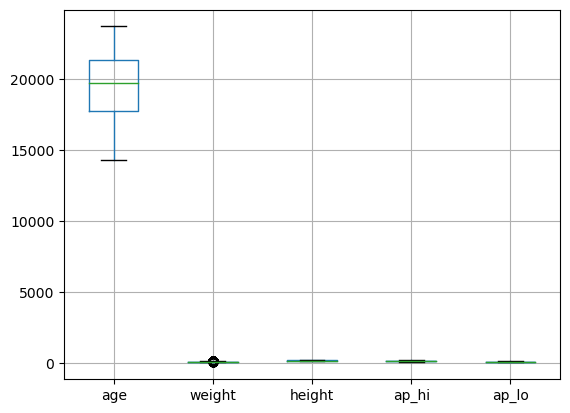

In [19]:
df.boxplot(numerical_col)
plt.show()

In [20]:
df['age'] = (df['age'] // 365).astype(int)

/var/folders/3x/tsxrtmqs7jq7xv162sz88xnc0000gn/T/ipykernel_36482/276809094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = (df['age'] // 365).astype(int)


In [21]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168.0,62.0,110.0,80.0,1,1,0,0,1,0
1,1,55,1,156.0,85.0,140.0,90.0,3,1,0,0,1,1
2,2,51,1,165.0,64.0,130.0,70.0,3,1,0,0,0,1
3,3,48,2,169.0,82.0,150.0,100.0,1,1,0,0,1,1
5,8,60,1,151.0,67.0,120.0,80.0,2,2,0,0,0,0


In [22]:
duplicate_sum = df.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

Dataset contains no Duplicate Values


In [23]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000
mean,49941.878468,52.908867,1.348581,164.406131,73.181456,126.420339,81.699146,1.357717,1.220649,0.086349,0.052174,0.804310,0.493904
std,28864.471866,6.741475,0.476525,7.531374,12.271998,14.289980,7.673399,0.675203,0.567601,0.280881,0.222380,0.396734,0.499967
min,0.000000,39.000000,1.000000,143.000000,40.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24876.500000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49980.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74848.750000,58.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,186.000000,107.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df.shape

(62502, 13)

#### Drop ID column

In [25]:
df = df.drop(['id'], axis=1)

In [26]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168.0,62.0,110.0,80.0,1,1,0,0,1,0
1,55,1,156.0,85.0,140.0,90.0,3,1,0,0,1,1
2,51,1,165.0,64.0,130.0,70.0,3,1,0,0,0,1
3,48,2,169.0,82.0,150.0,100.0,1,1,0,0,1,1
5,60,1,151.0,67.0,120.0,80.0,2,2,0,0,0,0


### TRAINING USING OneR

In [27]:
feature_cols = df.columns[:-1]  # all columns except the last one
target_col = df.columns[-1]  # the last column

In [28]:
X = df[feature_cols]
y = df[target_col]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Define the OneR algorithm
def oneR_algorithm(X_train, y_train):
    # Find the best attribute by trying to split on each of them
    best_attribute = None
    best_error_rate = float('inf')
    attribute_rules = {}

    for attribute in X_train.columns:
        # Count the frequency of each value of the attribute
        value_counts = X_train[attribute].value_counts().to_dict()

        # For each attribute value, find the most frequent class
        rules = {}
        errors = 0
        for value, count in value_counts.items():
            most_frequent_class = y_train[X_train[attribute] == value].mode()[0]
            rules[value] = most_frequent_class
            # Count errors for the current attribute
            errors += count - y_train[X_train[attribute] == value].value_counts()[most_frequent_class]

        # Calculate the error rate for the attribute
        error_rate = errors / len(X_train)

        # Update the best attribute if the current one is better
        if error_rate < best_error_rate:
            best_error_rate = error_rate
            best_attribute = attribute
            attribute_rules = rules

    return best_attribute, attribute_rules

In [31]:
# Train the OneR classifier
best_attribute, rules = oneR_algorithm(X_train, y_train)

In [32]:

# A function to make predictions using OneR
def oneR_predict(X, best_attribute, rules):
    predictions = []
    for index, row in X.iterrows():
        attribute_value = row[best_attribute]
        predictions.append(rules.get(attribute_value, y_train.mode()[0]))
    return predictions


In [33]:
y_pred = oneR_predict(X_test, best_attribute, rules)

In [34]:
print(f"The best attribute is: {best_attribute}")
print("The rules based on the best attribute are:")
print(rules)


The best attribute is: ap_hi
The rules based on the best attribute are:
{120.0: 0, 140.0: 1, 130.0: 1, 110.0: 0, 150.0: 1, 160.0: 1, 100.0: 0, 170.0: 1, 125.0: 0, 145.0: 1, 115.0: 0, 135.0: 1, 90.0: 0, 155.0: 1, 105.0: 0, 128.0: 0, 165.0: 1, 123.0: 0, 127.0: 0, 117.0: 0, 112.0: 0, 124.0: 0, 148.0: 1, 141.0: 1, 122.0: 0, 138.0: 1, 132.0: 0, 121.0: 0, 153.0: 1, 151.0: 1, 118.0: 0, 168.0: 1, 95.0: 0, 126.0: 0, 156.0: 1, 113.0: 0, 134.0: 1, 136.0: 1, 147.0: 1, 139.0: 1, 119.0: 0, 149.0: 1, 143.0: 1, 108.0: 0, 114.0: 0, 131.0: 1, 102.0: 0, 116.0: 0, 164.0: 1, 146.0: 1, 142.0: 1, 111.0: 0, 137.0: 0, 144.0: 0, 133.0: 0, 152.0: 1, 109.0: 0, 154.0: 1, 158.0: 1, 159.0: 1, 166.0: 0, 163.0: 1, 106.0: 0, 103.0: 0, 107.0: 0, 162.0: 0, 129.0: 0, 99.0: 0, 104.0: 1, 169.0: 1, 157.0: 1, 96.0: 0, 167.0: 1, 161.0: 1, 101.0: 0}


In [35]:
new_patient_data = {
    'age': [68],
    'gender': [1], 
    'height': [132], 
    'weight': [71],  
    'ap_hi': [140],  
    'ao_lo': [90],  
    'cholestrol': [2], 
    'gluc': [2],  
    'smoke': [0], 
    'alco': [1],  
    'active': [0]
}

In [36]:
# Convert the dictionary to a DataFrame
new_data = pd.DataFrame(new_patient_data)

In [37]:
# Use the trained OneR classifier to make predictions
new_predictions = oneR_predict(new_data, best_attribute, rules)

In [38]:
print("Predictions for the new data:")
print(new_predictions)

Predictions for the new data:
[1]


In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

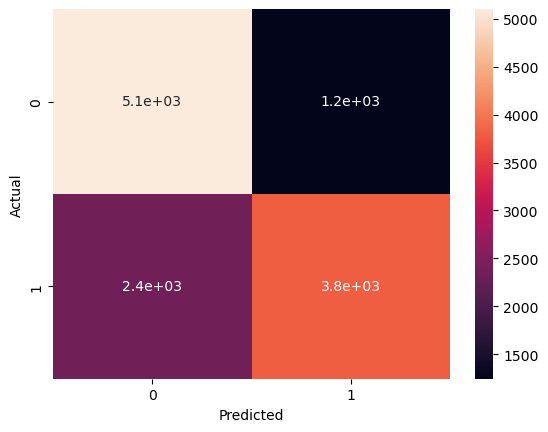

In [43]:
graph_nb = confusion_matrix(y_test, y_pred)
g_nb = pd.DataFrame(graph_nb, columns = np.unique(y_pred), index = np.unique(y_pred))
g_nb.index.name = 'Actual'
g_nb.columns.name = 'Predicted'

sns.heatmap(g_nb, annot = True)
plt.show()

In [45]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, y_pred)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, y_pred)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, y_pred)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, y_pred)[1][0]))

True Positive Cases : 3791
True Negative Cases : 5101
False Positive Cases : 1244
False Negative Cases : 2365


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.80      0.74      6345
           1       0.75      0.62      0.68      6156

    accuracy                           0.71     12501
   macro avg       0.72      0.71      0.71     12501
weighted avg       0.72      0.71      0.71     12501

